In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression as LR
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Data Serving

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.corr()

,year,consumption
year,1.000000,0.952411
consumption,0.952411,1.000000


In [4]:
data

,year,consumption
0,2012,527.96
1,2013,537.19
2,2014,542.87
3,2015,547.39
4,2016,553.98
5,2017,565.60
6,2018,581.05
7,2019,587.39
8,2020,566.49
9,2021,597.41


In [5]:
data = np.array(data)

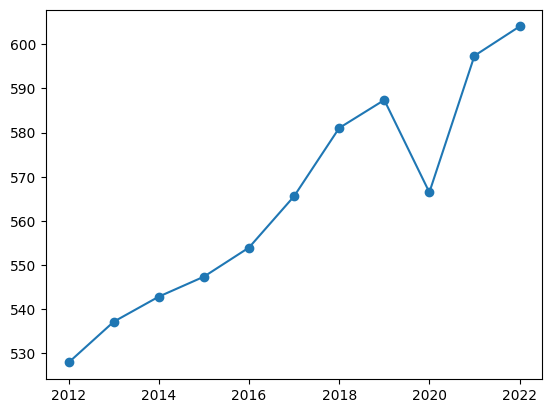

In [6]:
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1])
plt.show()

### TIme Series Method

In [7]:
data_ts = pd.read_csv('data.csv', index_col='year')

In [8]:
data_ts.columns

Index(['consumption'], dtype='object')

In [9]:
model_ts = ExponentialSmoothing(data_ts['consumption'], trend='add', seasonal='add', seasonal_periods=5)

c:\Users\Alex\Desktop\mendus\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
model_ts_fit = model_ts.fit()
forecast = model_ts_fit.forecast(steps=4)

c:\Users\Alex\Desktop\mendus\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Alex\Desktop\mendus\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
forecast

11    615.945625
12    621.955625
13    613.765624
14    632.520624
dtype: float64

### Linear Regresi to Predict data tren

In [12]:
model = LR()

In [13]:
model.fit(data[:,0].reshape(-1, 1), data[:,1])

LinearRegression()

In [14]:
model.coef_

array([7.26554545])

In [15]:
model.intercept_

-14089.935181818173

In [16]:
pred = lambda x : model.coef_[0]*x + model.intercept_

In [17]:
x = np.linspace(2012, 2035, dtype=int)
y = pred(x)

In [18]:
scatter_x = np.linspace(2023, 2035, dtype=int)
scatter_y = pred(scatter_x)

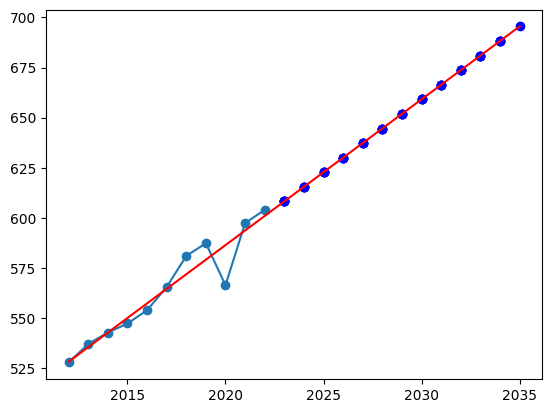

In [19]:
plt.scatter(data[:,0], data[:,1])
plt.plot(data[:,0], data[:,1])
plt.plot(x, y, color='red')
plt.scatter(scatter_x, scatter_y, color='blue')
plt.show()

In [20]:
inp = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035])

In [21]:
pred(inp)

array([608.26327273, 615.52881818, 622.79436364, 630.05990909,
       637.32545455, 644.591     , 651.85654545, 659.12209091,
       666.38763636, 673.65318182, 680.91872727, 688.18427273,
       695.44981818])